Problem 3.1

In [ ]:
from sklearn import datasets
import random
import sklearn
from sklearn.datasets import fetch_lfw_people
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [ ]:
dataset = fetch_lfw_people(min_faces_per_person=50)


In [ ]:
len(dataset['images'])


1560

In [10]:
tr = []
tr.append([1,2])
tr
tr.append([24,3])
tr
p = np.matrix(tr)

p.transpose()

matrix([[ 1, 24],
        [ 2,  3]])

In [2]:
import numpy as np
4*np.ones(3)/2

array([2., 2., 2.])

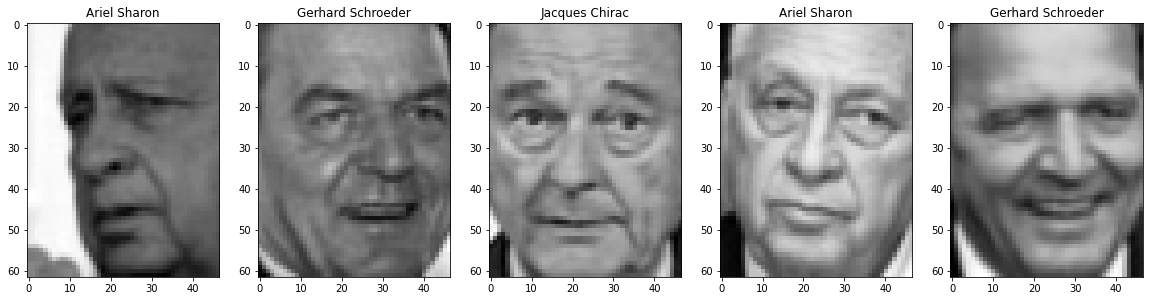

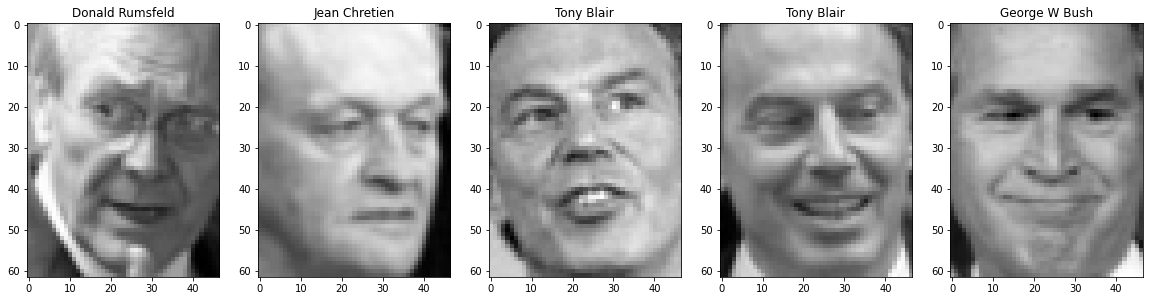

In [ ]:
indices = random.choices(range(1560),k=10)
indices = sorted(indices)
images = []
target = []
for i in indices:
    images.append(dataset['images'][i])
    target_index = dataset['target'][i]
    target.append(dataset['target_names'][target_index])

label_index = 0 
for i in range(2):
    fig, each_img = plt.subplots(1,5,figsize = (20,8))
    for p in range(5):
        each_img[p].imshow(images[label_index],cmap='gray',interpolation='none')
        each_img[p].set_title(target[label_index])
        label_index+=1
fig.show()
    

Problem 3.2


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(10)
X = dataset['data']
pca.fit(X)
X_pca_transformed = pca.transform(X)
X_pca_transformed.shape

(1560, 10)

In [ ]:
dataset['target_names'][:3]

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld'], dtype='<U17')

In [ ]:
invert_transform = pca.inverse_transform(X_pca_transformed)
invert_transform.shape

(1560, 2914)

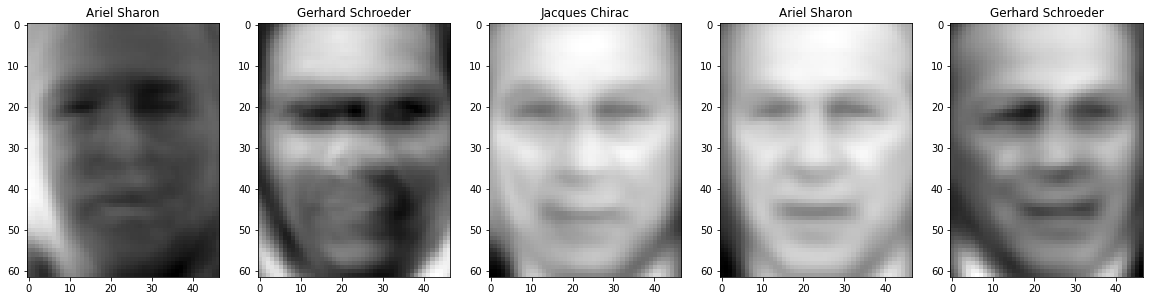

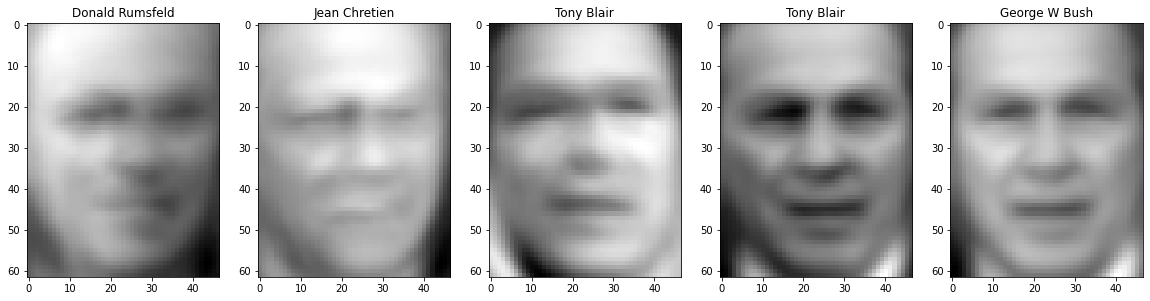

In [ ]:
images = []
target = []
for i in indices:
    images.append(invert_transform[i].reshape(62,47))
    target_index = dataset['target'][i]
    target.append(dataset['target_names'][target_index])

label_index = 0 
for i in range(2):
    fig, each_img = plt.subplots(1,5,figsize = (20,8))
    for p in range(5):
        each_img[p].imshow(images[label_index],cmap='gray',interpolation='none')
        each_img[p].set_title(target[label_index])
        label_index+=1
fig.show()

Problem 3.3

Text(0, 0.5, 'Cumulative Variance(%)')

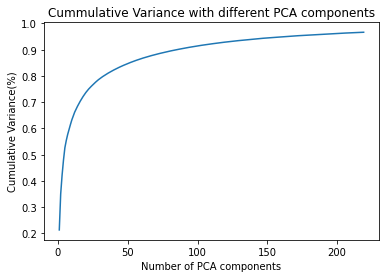

In [ ]:
all_variance = []
for n_components in range(1,220):
    pca = PCA(n_components)
    i_transformed = pca.fit_transform(dataset['data'])
    all_variance.append(pca.explained_variance_ratio_.sum())

plt.plot(range(1,220), all_variance)
plt.title("Cummulative Variance with different PCA components")
plt.xlabel ('Number of PCA components')
plt.ylabel ('Cumulative Variance(%)')

Problem 3.4


In [ ]:
for i in range(220):
    if all_variance[i]>0.95:
        print("No of PCA components needed to retain 95% variance is:",i+1)
        break

No of PCA components needed to retain 95% variance is: 164


So we need 164 Principal Components to retain  95% of variance of images

In [ ]:
all_variance[163]


0.9503526

Problem 3.5

In [1]:
print(dataset['data'].shape)

r_face_indices = random.sample(range(1560),k=150)
r_face_indices = sorted(r_face_indices)
print(r_face_indices)

dataset_r_faces = dataset['data'][r_face_indices]
print(dataset_r_faces.shape)
r_images = dataset['images'][r_face_indices]
target_r = dataset['target'][r_face_indices]
target_names_r=dataset['target_names'][target_r]

r_3_face_indices = random.sample(range(150),k=3)
r_3_face_indices = sorted(r_3_face_indices)
images_3 = []
target_3_labels = []
for i in r_3_face_indices:
    images_3.append(r_images[i])
    target_index = target_r[i]
    target_3_labels.append(target_names_r[i])
print(len(target_3_labels))
print(r_3_face_indices)
fig, each_img = plt.subplots(1,3,figsize = (20,8))
for label_index in range(3):
    each_img[label_index].imshow(images_3[label_index],cmap='gray',interpolation='none')
    each_img[label_index].set_title(target_3_labels[label_index])
fig.show()
    



NameError: name 'dataset' is not defined

In [ ]:
pca_5 = PCA(5)
pca_5.fit(dataset_r_faces)
X_pca_5_transformed = pca_5.transform(dataset_r_faces)
X_pca_5_transformed.shape

(150, 5)

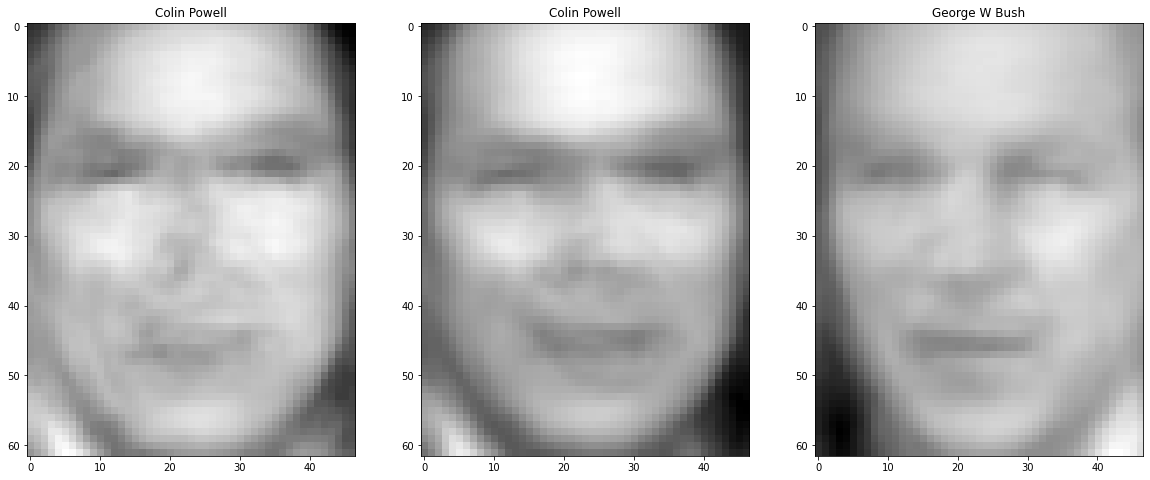

In [ ]:
invert_transform = pca_5.inverse_transform(X_pca_5_transformed)
invert_transform.shape

images_3_5 = []
for i in r_3_face_indices:
    images_3_5.append(invert_transform[i].reshape(62,47))

fig, each_img = plt.subplots(1,3,figsize = (20,8))
for label_index in range(3):
    each_img[label_index].imshow(images_3_5[label_index],cmap='gray',interpolation='none')
    each_img[label_index].set_title(target_3_labels[label_index])
fig.show()

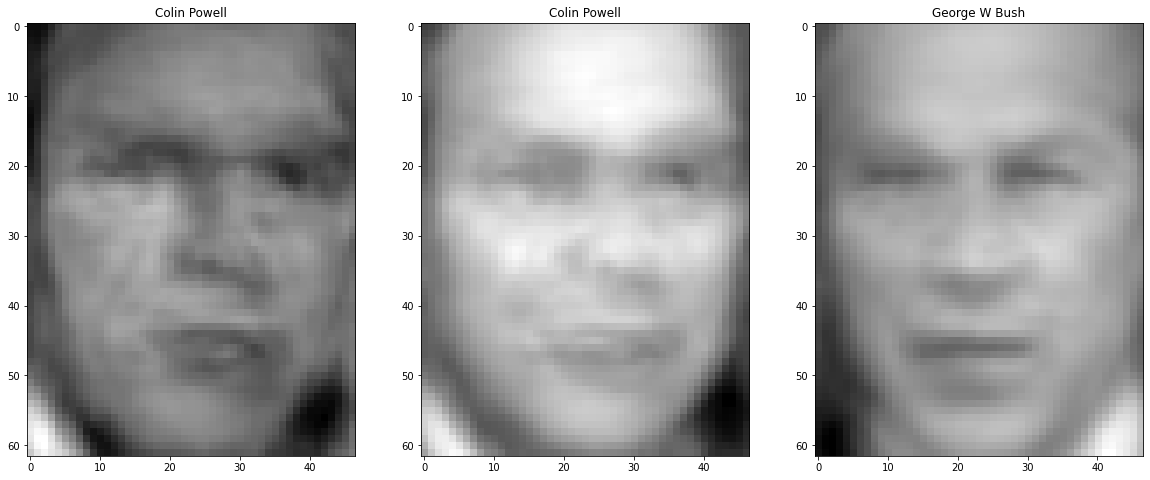

In [ ]:
pca_10 = PCA(10)
pca_10.fit(dataset_r_faces)
X_pca_10_transformed = pca_10.transform(dataset_r_faces)
X_pca_10_transformed.shape

invert_transform = pca_10.inverse_transform(X_pca_10_transformed)
invert_transform.shape

images_3_10 = []
for i in r_3_face_indices:
    images_3_10.append(invert_transform[i].reshape(62,47))

fig, each_img = plt.subplots(1,3,figsize = (20,8))
for label_index in range(3):
    each_img[label_index].imshow(images_3_10[label_index],cmap='gray',interpolation='none')
    each_img[label_index].set_title(target_3_labels[label_index])
fig.show()

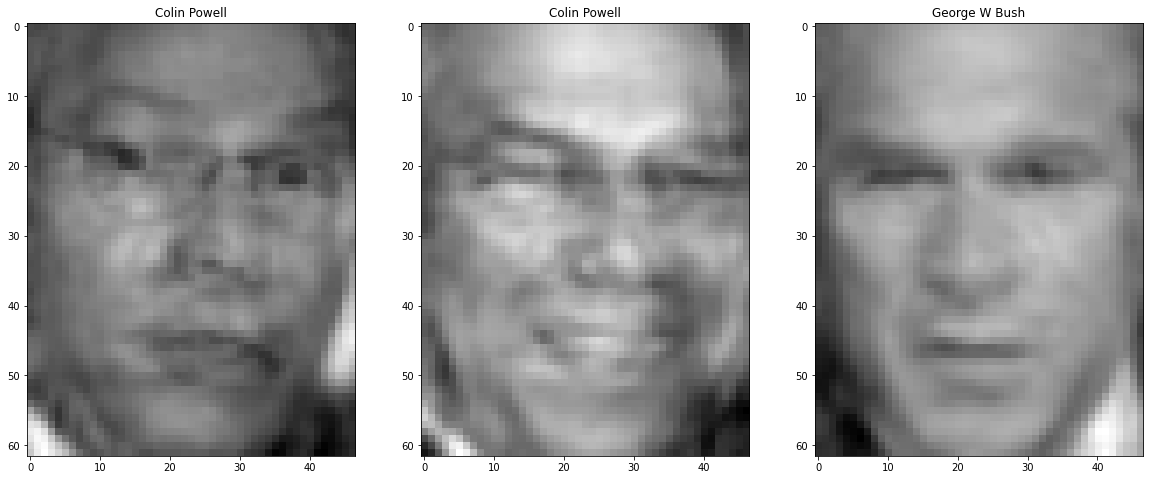

In [ ]:
pca_50 = PCA(50)
pca_50.fit(dataset_r_faces)
X_pca_50_transformed = pca_50.transform(dataset_r_faces)
X_pca_50_transformed.shape

invert_transform = pca_50.inverse_transform(X_pca_50_transformed)
invert_transform.shape

images_3_50 = []
for i in r_3_face_indices:
    images_3_50.append(invert_transform[i].reshape(62,47))

fig, each_img = plt.subplots(1,3,figsize = (20,8))
for label_index in range(3):
    each_img[label_index].imshow(images_3_50[label_index],cmap='gray',interpolation='none')
    each_img[label_index].set_title(target_3_labels[label_index])
fig.show()

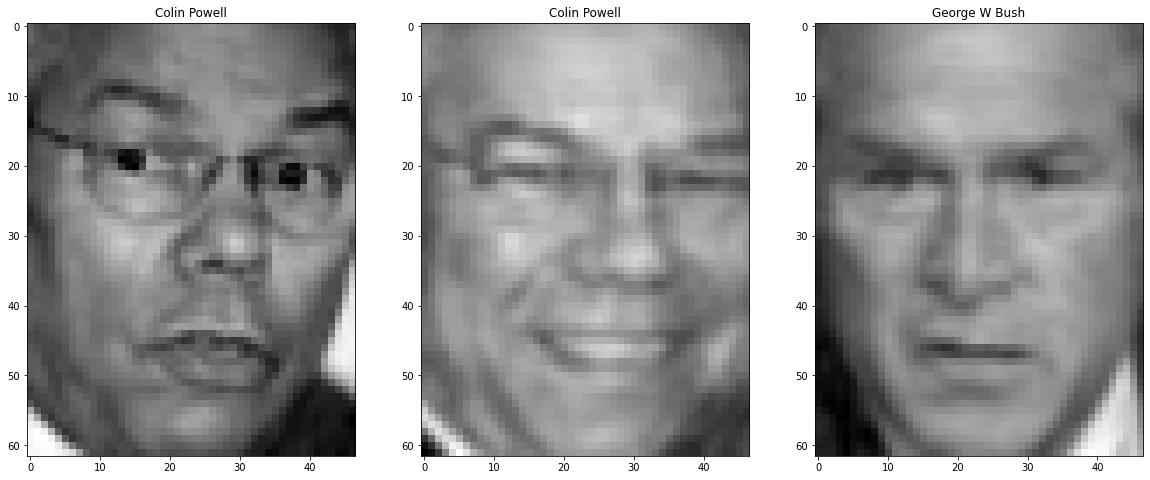

In [ ]:
pca_100 = PCA(100)
pca_100.fit(dataset_r_faces)
X_pca_100_transformed = pca_100.transform(dataset_r_faces)
X_pca_100_transformed.shape

invert_transform = pca_100.inverse_transform(X_pca_100_transformed)
invert_transform.shape

images_3_100 = []
for i in r_3_face_indices:
    images_3_100.append(invert_transform[i].reshape(62,47))

fig, each_img = plt.subplots(1,3,figsize = (20,8))
for label_index in range(3):
    each_img[label_index].imshow(images_3_100[label_index],cmap='gray',interpolation='none')
    each_img[label_index].set_title(target_3_labels[label_index])
fig.show()

Problem 3.6

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
len(dataset['data'])


1560

In [ ]:

target_data = []
for i in range(len(dataset['data'])):
    target_index = dataset['target'][i]
    target_data.append(dataset['target_names'][target_index])

print(len(target_data))
print(X.shape)

1560
(1560, 2914)


In [ ]:
set(target_data)

{'Ariel Sharon',
 'Colin Powell',
 'Donald Rumsfeld',
 'George W Bush',
 'Gerhard Schroeder',
 'Hugo Chavez',
 'Jacques Chirac',
 'Jean Chretien',
 'John Ashcroft',
 'Junichiro Koizumi',
 'Serena Williams',
 'Tony Blair'}

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,target_data,test_size=0.3,random_state=70)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
logisticRegressor = LogisticRegression(max_iter=500)
pca = PCA(164)
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X_train)
X_train_scaled = minmaxscaler.transform(X_train)
X_test_scaled = minmaxscaler.transform(X_test)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)
print(X_train_scaled_pca.shape, X_test_scaled_pca.shape)

(1092, 164) (468, 164)


In [ ]:
logisticRegressor.fit(X_train_scaled_pca,y_train)
target_predict = logisticRegressor.predict(X_test_scaled_pca)


In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,target_predict))
print(accuracy_score(y_test,target_predict))

                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.72      0.70        18
     Colin Powell       0.74      0.86      0.80        64
  Donald Rumsfeld       0.70      0.91      0.79        35
    George W Bush       0.87      0.86      0.87       157
Gerhard Schroeder       0.52      0.55      0.53        31
      Hugo Chavez       0.79      0.53      0.63        36
   Jacques Chirac       0.69      0.58      0.63        19
    Jean Chretien       0.93      0.78      0.85        18
    John Ashcroft       0.38      0.50      0.43        12
Junichiro Koizumi       0.82      0.70      0.76        20
  Serena Williams       0.91      0.62      0.74        16
       Tony Blair       0.79      0.79      0.79        42

         accuracy                           0.77       468
        macro avg       0.73      0.70      0.71       468
     weighted avg       0.78      0.77      0.77       468

0.7670940170940171


In [ ]:
logisticRegressor2 = LogisticRegression(max_iter=500)
logisticRegressor2.fit(X_train_scaled,y_train)
target_predict_orig = logisticRegressor2.predict(X_test_scaled)

print(classification_report(y_test,target_predict_orig))

                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.72      0.70        18
     Colin Powell       0.75      0.88      0.81        64
  Donald Rumsfeld       0.72      0.89      0.79        35
    George W Bush       0.86      0.88      0.87       157
Gerhard Schroeder       0.56      0.61      0.58        31
      Hugo Chavez       0.87      0.56      0.68        36
   Jacques Chirac       0.65      0.58      0.61        19
    Jean Chretien       0.88      0.78      0.82        18
    John Ashcroft       0.57      0.67      0.62        12
Junichiro Koizumi       0.88      0.70      0.78        20
  Serena Williams       0.89      0.50      0.64        16
       Tony Blair       0.80      0.79      0.80        42

         accuracy                           0.78       468
        macro avg       0.76      0.71      0.72       468
     weighted avg       0.79      0.78      0.78       468



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print(accuracy_score(y_test,target_predict_orig))

0.7799145299145299


Observations:  

1) We can see that the overall accuracy of all the classes of images, after dimensionality reduction with 164 PCA components is 0.767

2) We can see that the overall accuracy of all the classes of images, with the original data is 0.7799

3) Thereby, the accuracy of the classifier doesnot change in overall, even after we reduced dimensions from 2914 to 164 features using PCA, as we made sure that 95% of variance of images is retained, we are able to achieve almost same prediction performance on PCA transformed data as that of original data.

Problem 4

In [ ]:
X, y = sklearn.datasets.fetch_openml('mnist_784', return_X_y=True)

In [ ]:

dataset =pd.concat([X,y],axis=1)

dataset_sample = dataset.sample(n=10000)

In [ ]:
dataset_sample.shape

(10000, 785)

In [ ]:
X_sample = dataset_sample.iloc[:,:-1]
y_sample = dataset_sample.iloc[:,-1]

In [ ]:
print(X.shape,y.shape,X_sample.shape, y_sample.shape)

(70000, 784) (70000,) (10000, 784) (10000,)


In [ ]:
from sklearn.manifold import TSNE

# call TSNE() to fit the data
tsn = TSNE(n_components=2,n_jobs=-1)

tsn_model = tsn.fit_transform(X_sample)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
tsn_dataset = pd.DataFrame(tsn_model,columns=['x','y'])
y_dataset = pd.DataFrame(y_sample,columns=['class'])
y_dataset = y_dataset.reset_index(drop=True)
tsn_dataset = pd.concat([tsn_dataset,y_dataset],axis=1)
tsn_dataset.head()

,x,y,class
0,-8.708436,-35.510929,4
1,-15.548179,66.246407,6
2,-21.184570,-75.594696,7
3,27.761736,21.009233,8
4,-47.354450,-16.055426,9


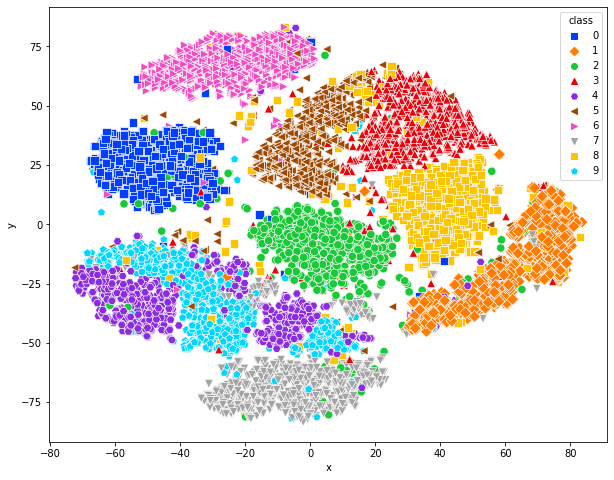

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import markers

#all_shapes = list(markers.MarkerStyle.markers.keys())

all_shapes = [',', 'D', 'o', '^', 'H', '<', '>', 'v', 's', 'p', '*', 'h', '8', 'P', 'd', '.', 'X']

n=len(set(tsn_dataset['class']))

palette=sns.color_palette("bright",n)

# get a figure handle
fig,ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x='x', 
                y='y', 
                s=70,
                hue='class', 
                style='class',
                markers=all_shapes[:n],
                data=tsn_dataset,
                palette=palette)

plt.show()

Observations:
1) We could see that 0 , 2 , 6, 8(most of the samples of 8)  are easily distinguishable from other numbers

2) Where as 1 , 7 are individually slightly less distuinshable, comparative with above class labels

3) Finally, 3 & 5 & 8 are hard to distingusih from eachother,  4 & 9 are hard distinguish from eachother